### Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Tratamento de dados

- Dados foram tirados das contas de luz da casa de um integrante do grupo( Pedro Lucchiari), que pode ser vista na primeira linha de cada arquivo. O restante dos dados que podem ser vistos foram estipulados com base no tirado com a meta de mostrar a funcionalidae do código.

In [2]:
account = pd.read_csv("Kappel_Data_Conta.csv",on_bad_lines='skip',sep = ';')
consume=pd.read_csv("Kappel_Data_Kwh.csv",on_bad_lines='skip',sep=';')

- Limpeza de dados que são necessários: Remoção de dados redundantes, outliers, incompletos; Alteração de dados.

In [3]:
#Verificação se os dados não possuem nenhuma linha vazia (exemplo)
account=account.dropna(how='any')
consume=consume.dropna(how='any')
print(account.isnull().values.any())
print(consume.isnull().values.any())

False
False


### Análise exploratória
- Procedimento em que há a extração de resultados que queremos.

In [4]:
# Conta e consumo mensal de cada funcionário
clientsbill =[]
clientsconsume = []
for (client,used) in zip(account.index,consume.index):
    avarage =0
    for price in account[1:]:
         avarage = avarage + account[price][client]
    avarage=avarage/12
    clientsbill.append(round(avarage,2))
    useavarage = 0
    for quant in consume[1:]:
        useavarage = useavarage + consume[quant][used]
    useavarage=useavarage/12
    clientsconsume.append(round(useavarage,2))
    print(f'Funcionário {round(client +1)} pagou em média {round(avarage,2)} R$ e consumiu {round(useavarage,2)} Kw/h no mercado regulado ')

Funcionário 1 pagou em média 394.54 R$ e consumiu 409.42 Kw/h no mercado regulado 
Funcionário 2 pagou em média 386.39 R$ e consumiu 408.75 Kw/h no mercado regulado 
Funcionário 3 pagou em média 379.08 R$ e consumiu 389.33 Kw/h no mercado regulado 
Funcionário 4 pagou em média 368.95 R$ e consumiu 397.92 Kw/h no mercado regulado 
Funcionário 5 pagou em média 440.86 R$ e consumiu 498.42 Kw/h no mercado regulado 


- A energia arrendada pelo funcionário será uma função do seu consumo energético médio e da quantidade de energia renovável de interesse do cliente. Os cálculos são feitos considerando margens de segurança aplicadas tanto no consumo médio quanto no volume de energia que será arrendada.

- Para isso, calculamos o rendimento médio da produção de energia solar das quatro usinas de geração distribuída no estado de São Paulo ao longo dos últimos seis meses (dados abertos adquiridos no banco de dados da ONS).
- O rendimento médio da produção de energia solar foi de 34,5%.

In [5]:
leasedenergy =[]
for energy in clientsconsume:
    leasedenergy.append(energy/0.345)
for (i,a) in zip(range(len(leasedenergy)),leasedenergy):
    print(f'A energia arrendada para o funcionário {i +1} é de {round(a,2)} Kw/h')
print('\n')
print(f'A energia sustentável arrendada pela empresa é {round(sum(leasedenergy),2)} Kw/h')

A energia arrendada para o funcionário 1 é de 1186.72 Kw/h
A energia arrendada para o funcionário 2 é de 1184.78 Kw/h
A energia arrendada para o funcionário 3 é de 1128.49 Kw/h
A energia arrendada para o funcionário 4 é de 1153.39 Kw/h
A energia arrendada para o funcionário 5 é de 1444.7 Kw/h


A energia sustentável arrendada pela empresa é 6098.09 Kw/h


### Resultados para disponíveis para o funcionário

In [6]:
# Economia mensal para o funcionário de 20 a 25%(https://www.alemdaenergia.engie.com.br/migracao-para-o-mercado-livre-pode-gerar-economia-de-ate-25/)
# Pegando 22% como referência.Temos a seguinte economia anual
saved=[]
for a in clientsbill:
    b = 12*(a*0.22)
    saved.append(b)
saved = saved[::-1]

for (i,a) in zip(range(len(saved)), saved):
    print(f'Funcionário {i + 1} economizou {round(a,2)} em um ano')

Funcionário 1 economizou 1163.87 em um ano
Funcionário 2 economizou 974.03 em um ano
Funcionário 3 economizou 1000.77 em um ano
Funcionário 4 economizou 1020.07 em um ano
Funcionário 5 economizou 1041.59 em um ano


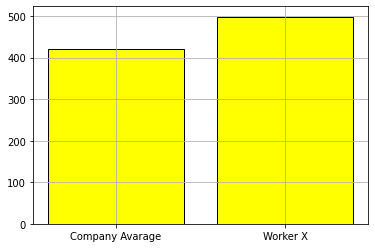

In [7]:
#Parte que terá no relatório personalizado para cada cliente
companyavarage=0
for bill in clientsconsume:
    companyavarage = companyavarage + bill
companyavarage=companyavarage/len(clientsconsume)
compare=[]
compare.append(companyavarage)
compare.append(clientsconsume[4])
langs=['Company Avarage','Worker X']
plt.bar(langs,compare,color='yellow',edgecolor='black')
plt.grid()
plt.show()

In [8]:
# Mostra a grandeza da economia em outra escala
# Outro dado relevante para o funcionário a fim de conscientizá-lo
# Ser como alerta caso o funcionário consuma energia demais
if compare[1] > compare[0]:
    exceed = 100*(compare[1] - compare[0])/compare[0]
    print(f'Funcionário X ultrapassou em {round(exceed,2)}%')
else:
    bellow = 100*(compare[0] - compare[1])/compare[0]
    print(f'Funcionário X ficou abaixo em {round(bellow,2)}%.')

Funcionário X ultrapassou em 18.45%
